In [121]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [122]:
iris = load_iris()
iris.target_names
df = pd.DataFrame(data = iris.data,columns = iris.feature_names)
df['target'] = iris.target
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
12,4.8,3.0,1.4,0.1,0
62,6.0,2.2,4.0,1.0,1
75,6.6,3.0,4.4,1.4,1
113,5.7,2.5,5.0,2.0,2
86,6.7,3.1,4.7,1.5,1
58,6.6,2.9,4.6,1.3,1
51,6.4,3.2,4.5,1.5,1
10,5.4,3.7,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
11,4.8,3.4,1.6,0.2,0


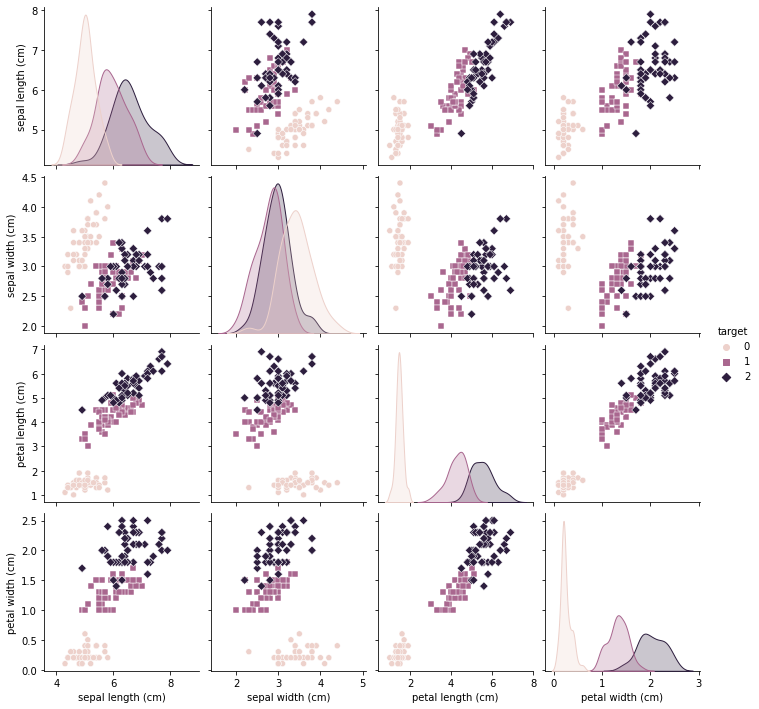

In [123]:
import  matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df,hue='target',markers=["o", "s", "D"])
plt.show()

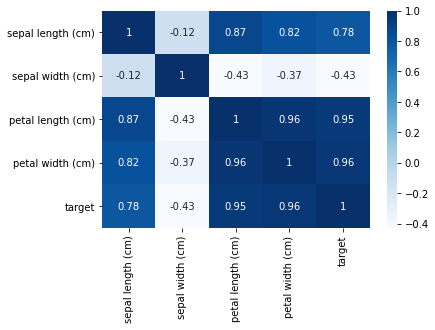

In [124]:
sns.heatmap(df.corr(),annot = True,cmap = 'Blues')
plt.show()

In [125]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import label_binarize
X = df.drop('target',axis = 1)
y = df.target
y = label_binarize(y, classes=[0, 1, 2])
n_classes = 3
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.25 , random_state = 67)


In [126]:
# clf = LogisticRegression(multi_class ='ovr')
# clf.fit(X_train,y_train)
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

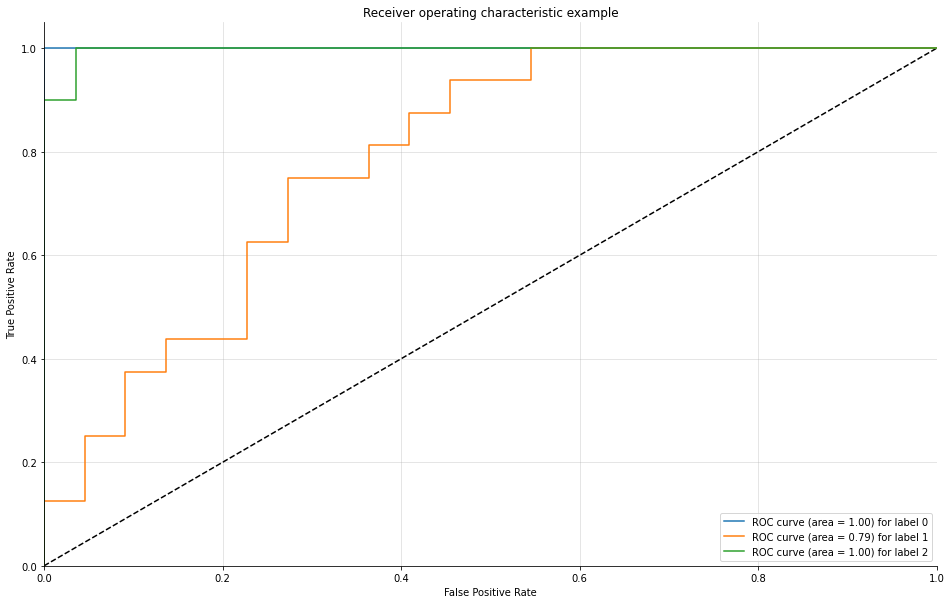

In [127]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = y_test
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(clf, X_test, y_test, n_classes=3, figsize=(16, 10))

In [128]:
y_pred = clf.predict(X_test)
# y_pred

In [129]:
roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')

0.8231373889268627

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

60.526315789473685

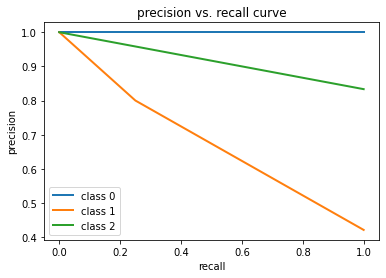

In [131]:
from sklearn.metrics import PrecisionRecallDisplay,precision_recall_curve

# # 
# precision, recall, _ = precision_recall_curve(y_test, y_pred)
# disp = PrecisionRecallDisplay(precision=precision, recall=recall)
# disp.plot()

# plt.show()
# # 
# display = PrecisionRecallDisplay.from_estimator(
#     clf, X_test, y_test, name="Logistic Regression"
# )
# _ = display.ax_.set_title("2-class Precision-Recall curve")

precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()